In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
import os
import shutil
import random

# Function to split data into training and testing sets
def split_data(source_dir, train_dir, test_dir, train_ratio=0.8):
    """
    Splits data from a source directory into training and testing directories.

    Args:
        source_dir (str): Path to the directory containing the original data.
        train_dir (str): Path to the directory where training data will be stored.
        test_dir (str): Path to the directory where testing data will be stored.
        train_ratio (float): Ratio of data to use for training (default is 0.8).

    Returns:
        None
    """
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for subfolder_name in os.listdir(source_dir):
        subfolder_path = os.path.join(source_dir, subfolder_name)
        if not os.path.isdir(subfolder_path):
            continue

        # Create train/test subfolders
        train_subfolder = os.path.join(train_dir, subfolder_name)
        test_subfolder = os.path.join(test_dir, subfolder_name)
        os.makedirs(train_subfolder, exist_ok=True)
        os.makedirs(test_subfolder, exist_ok=True)

        # Get a list of all files in the subfolder
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        
        # Shuffle files to ensure random selection
        random.shuffle(files)  

        # Split files based on the given ratio
        split_index = int(len(files) * train_ratio)
        train_files = files[:split_index]
        test_files = files[split_index:]

        # Move files to the train directory
        for file_name in train_files:
            shutil.move(os.path.join(subfolder_path, file_name), os.path.join(train_subfolder, file_name))

        # Move files to the test directory
        for file_name in test_files:
            shutil.move(os.path.join(subfolder_path, file_name), os.path.join(test_subfolder, file_name))

        print(f"Processed {subfolder_name}: {len(train_files)} train, {len(test_files)} test")

        
        
# Paths
source_dir = "/your Dataset"
train_dir = "/your Train_dir"
test_dir = "/your Test_dir"

# Run function
split_data(source_dir, train_dir, test_dir, train_ratio=0.8)

In [ ]:
# Image preprocessing and augmentation

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

# Generate training data
train_datagen_stan = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)


In [34]:
train_generator_stan = train_datagen_stan.flow_from_directory(
        '/your Train_dir',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 1198 images belonging to 9 classes.


In [35]:
# Check data for correct class names
class_names = list(train_generator_stan.class_indices.keys())
class_names

['cadillac_escalade',
 'gmc_sierra',
 'honda_civic',
 'jeep_wrangler',
 'porsche_cayenne',
 'ram_1500',
 'tesla_series_3',
 'toyota_camry',
 'toyota_rav4']

In [36]:
# Generate test data
test_datagen_stan = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

test_generator_stan = test_datagen_stan.flow_from_directory(
        '/your Test_dir',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 310 images belonging to 9 classes.


In [47]:
# Function to make predictions on images within test set
def predict(model, img):
    """
    Predicts the class of an image using the trained model.

    Args:
        model (tf.keras.Model): Trained model.
        img (np.array): Input image.

    Returns:
        predicted_class (str): Predicted class label.
        confidence (float): Confidence score (percentage).
    """
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
# Final model

In [87]:
# Build CNN model 
modelf = Sequential()

modelf.add(Convolution2D(64, (3, 3), input_shape=(128, 128, 3), activation='relu'))
modelf.add(MaxPooling2D(pool_size=(2, 2)))
modelf.add(Convolution2D(64, (3, 3), activation='relu'))
modelf.add(MaxPooling2D(pool_size=(2, 2)))

modelf.add(Flatten())

modelf.add(Dense(units=128, activation='relu'))
modelf.add(Dropout(0.1))
modelf.add(Dense(units=64, activation='relu'))
modelf.add(Dropout(0.1))
modelf.add(Dense(units=9, activation='softmax')) 

In [88]:
# Show model architecture
modelf.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,420,489 (28.31 MB)

 Trainable params: 7,420,489 (28.31 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    patience=5,          
    restore_best_weights=True 
)

# Compile the model
modelf.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

# Train the model
historyf = modelf.fit(
    train_generator_stan,
    validation_data=test_generator_stan,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.1385 - loss: 2.4121 - val_accuracy: 0.1935 - val_loss: 2.1392
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.2078 - loss: 2.0923 - val_accuracy: 0.2581 - val_loss: 1.9726
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.2892 - loss: 1.9858 - val_accuracy: 0.3355 - val_loss: 1.8759
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.3759 - loss: 1.7591 - val_accuracy: 0.3871 - val_loss: 1.7251
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.4515 - loss: 1.5469 - val_accuracy: 0.3935 - val_loss: 1.6034
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.5515 - loss: 1.2731 - val_accuracy: 0.5484 - val_loss: 1.4537
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.6275 - loss: 1.0953 - val_accuracy: 0.5935 - val_loss: 1.3301
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.6701 - loss: 0.9430 - val_accuracy: 0.

In [90]:
# Evaluate the model on the test set
scores = modelf.evaluate(test_generator_stan)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.7898 - loss: 0.9344


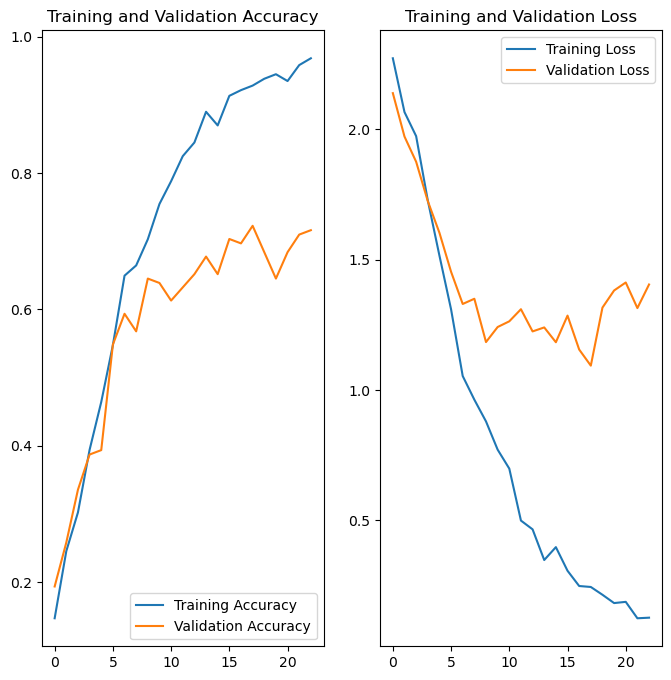

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


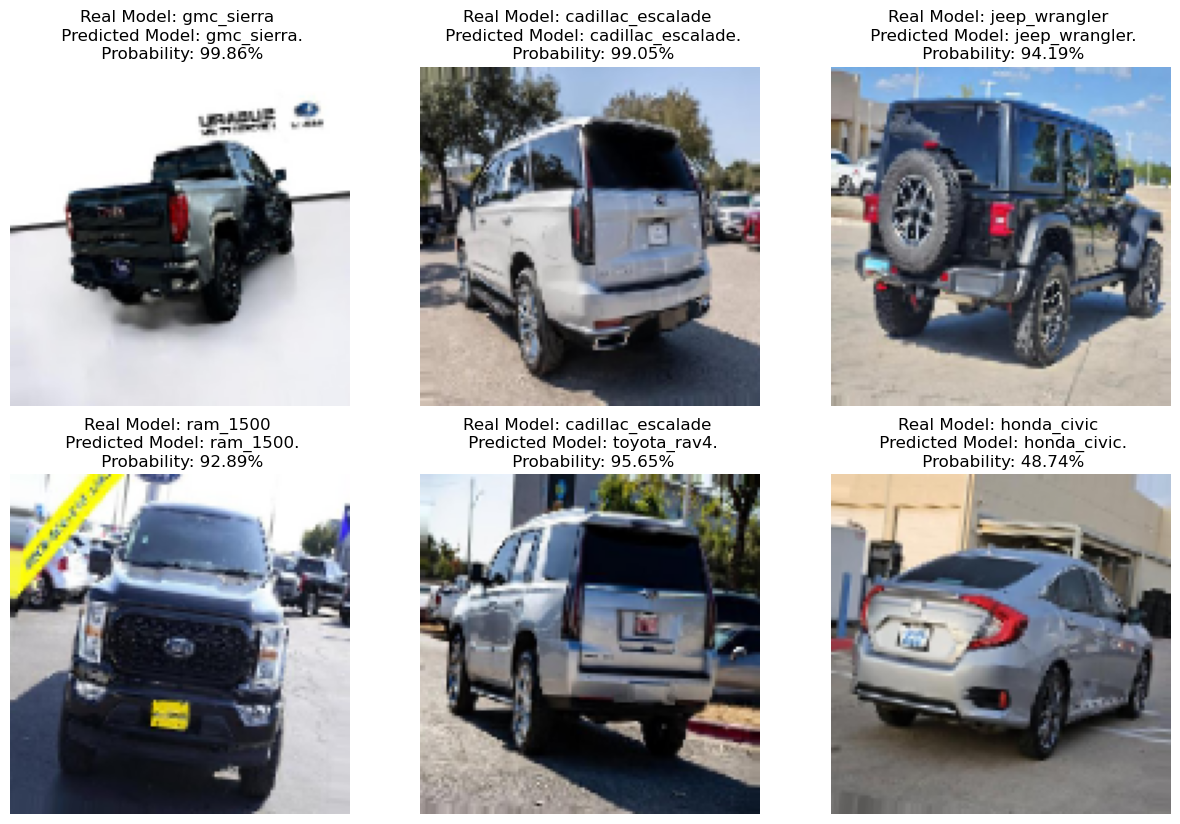

In [106]:
# Plot training and validation accuracy/loss
acc = historyf.history['accuracy']
val_acc = historyf.history['val_accuracy']

loss = historyf.history['loss']
val_loss = historyf.history['val_loss']

EPOCHS = len(acc)

# Accuracy and loss plots
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Predictions on images
plt.figure(figsize=(15, 15))
for images, labels in test_generator_stan:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(modelf, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Real Model: {actual_class} \n Predicted Model: {predicted_class}.\n Probability: {confidence}%")
        
        plt.axis("off")
    break